<a href="https://colab.research.google.com/github/josue180610/Project_Attack/blob/main/Proy_AtaqueCorazon_version_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/sample_data/heart.csv', sep=",", encoding='latin1')

Leemos nuestro dataset importado desde el comando pd.read_excel y le indicamos la hoja si en caso tuviera más de una.

# **EXPLORACIÓN DE DATA**

In [ ]:
df.shape

(1025, 14)

**Resultados**: El comando shape nos indica que el dataset que se está analizando tiene 1025 filas y 14 columnas.

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Resultados**: Podemos ver que el comando head nos permite visualizar un poco sobre el dataset como las columnas indicadas y limitándolo a mostrarnos 5 registros.

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Resultado**: Visualizamos que no existen valores nulos en ningún campo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Resultado**: Podemos visualizar el tipo de dato de cada columna y la cantidad de registros que tienen.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Resultado**: Analizando las variables numericas. Vemos que los valores son normales y no existe una data desbalanceada en la variable target.

De la siguiente información se puede realizar la siguiente interpretación:
1. El promedio de la variable "age" es 54, cuyo valor mínimo registrado es 29 y un máximo de 77 años.
2. Otro de las variables que podemos observar es "chol", el caul, muestra que existe un promedio de 246, con un mínimo de 126 y un máximo de 564 por persona.
3. También podemos observar el valor promedio de latidos "thalach", cuyo valor es 149, cuyo valor mínimo es 23, y máximo 202, por persona, basado en la edad.

# **Variable objetivo (Target)**

In [ ]:
df['target'].value_counts(normalize=False).to_frame('Cantidad').join(
    df['target'].value_counts(normalize=True).mul(100).round(2).to_frame('Proporción (%)')
)

,Cantidad,Proporción (%)
target,,
1,526,51.32
0,499,48.68


**Resultado**: La variable target cuenta con dos tipos valores:
1. "0": Indica la menor probabilidad de ataque cardiáco que puede sufrir una persona.
2. "1": Indica la mayor probabildiad que tiene una persona en sufrir un ataque.

Mediante la consulta ejecutada, podemos observación la distribución, en cantidad, de las personas con una alta y baja probabilidad de sufrir la enfermedad mencioanda, lo cual no sirve mucho para el análisis predictivo, luego de realizar el entramiento.

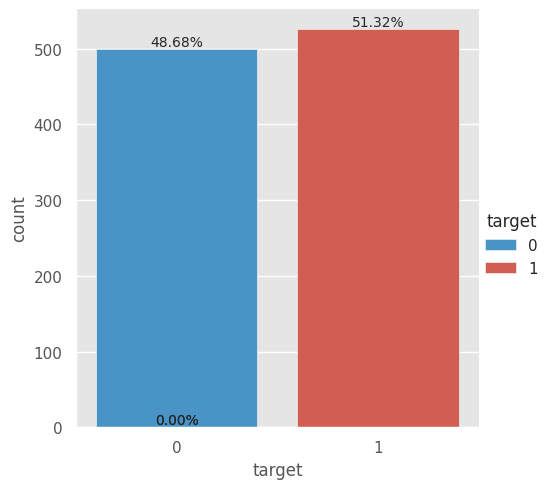

In [ ]:
g=sns.catplot(x='target', data=df, kind="count", hue="target" ,palette=["#3498db", "#e74c3c"],legend='brief', legend_out=True)

total_data= len(df)
const_total_data = 1025
collection_count_data = []
for val in g.axes.flat:
  for patch in val.patches:  # Itera por cada barra
        count = int(patch.get_height())  # Obtén el alto de la barra
        val.annotate(
            f'{(count/const_total_data)*100:.2f}%',  # Texto a mostrar
            (patch.get_x() + patch.get_width() / 2, patch.get_height()),  # Coordenadas (x, y)
            ha='center',  # Centra el texto horizontalmente
            va='bottom'   # Posiciona el texto justo arriba de la barra
        )

plt.show()

**Resultado**: De una forma más gráfica podemos visualizar la variable target con una distribución pareja lo cual no ayudará mucho al momento de clasificar. No existe un desvalance de información.

También podemos visualizar el porcentaje de información que existe para cada condición y confirmar que el desvalance que existe, no tiene una brecha tan alta, ya que, solo difieren en 2.64%.

# **VARIABLES CUANTITATIVAS**

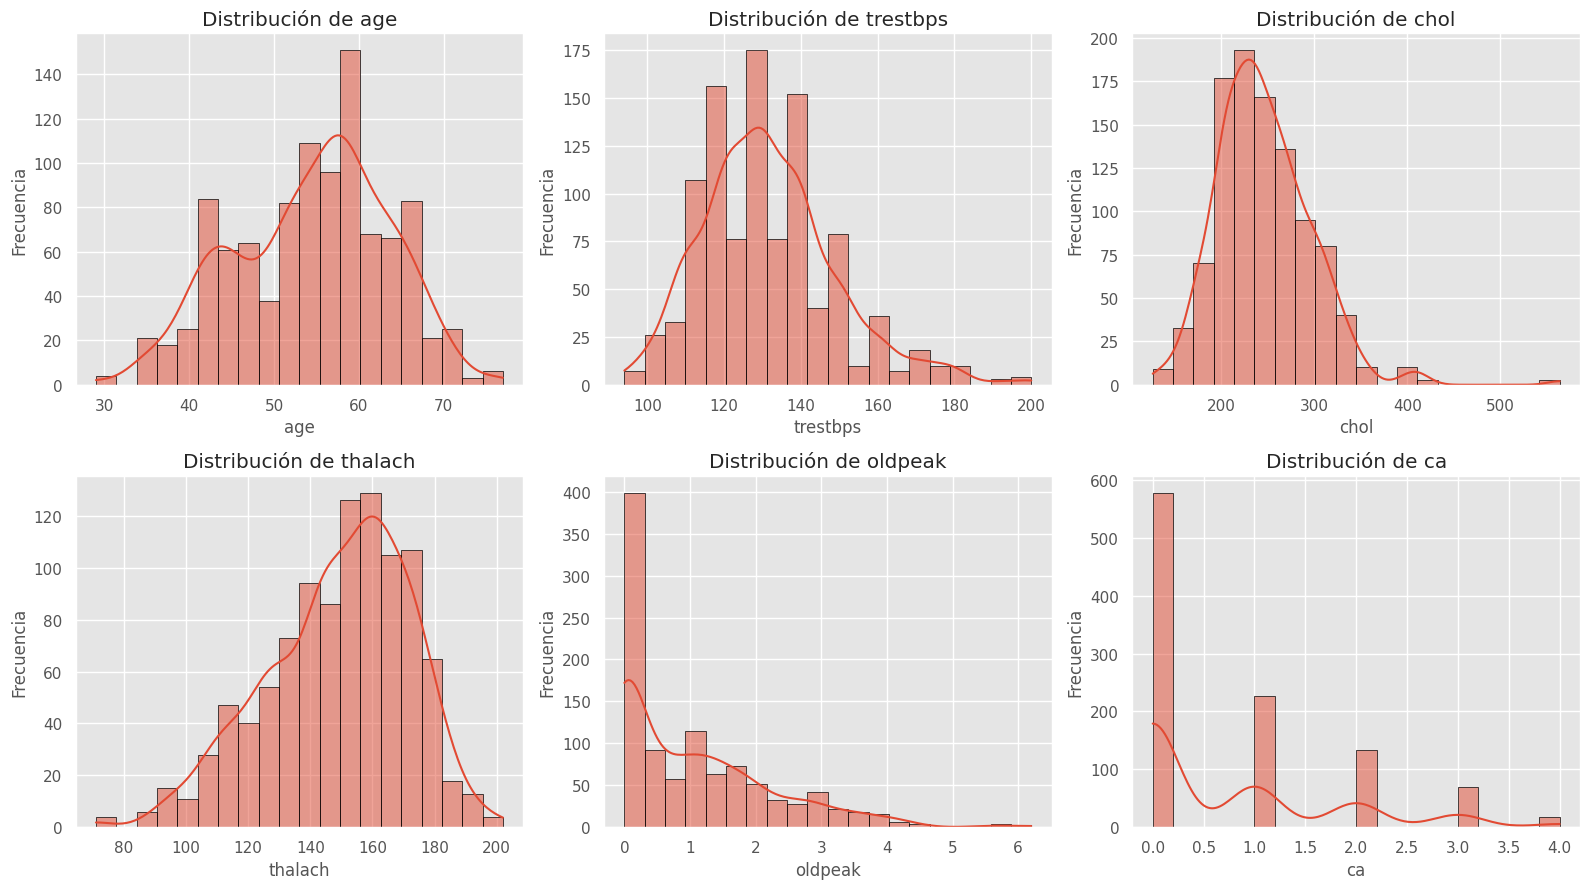

In [ ]:
Var=['age','trestbps','chol','thalach','oldpeak','ca']

for i, var in enumerate(Var, 1):
    plt.subplot(2, 3, i)  # Organiza en una cuadrícula de 2 filas x 3 columnas
    sns.histplot(df[var], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Resultado**: En base a los gráficos presentados,podemos observar que existe una gran cantidad de personas,cuyo rango de edad se concentra entre los 50-60 años.
También podemos observar que las variables **chol** y **thalach** tienen valores en proporciones altas, lo que podría ser un indicador para el análisis de nuestro modelo.
Según la gráfica, las variables: **trestbps, oldpeak, ca** pueden presentar variables atípicas (outliers) ya que tienen valores a los extremos.

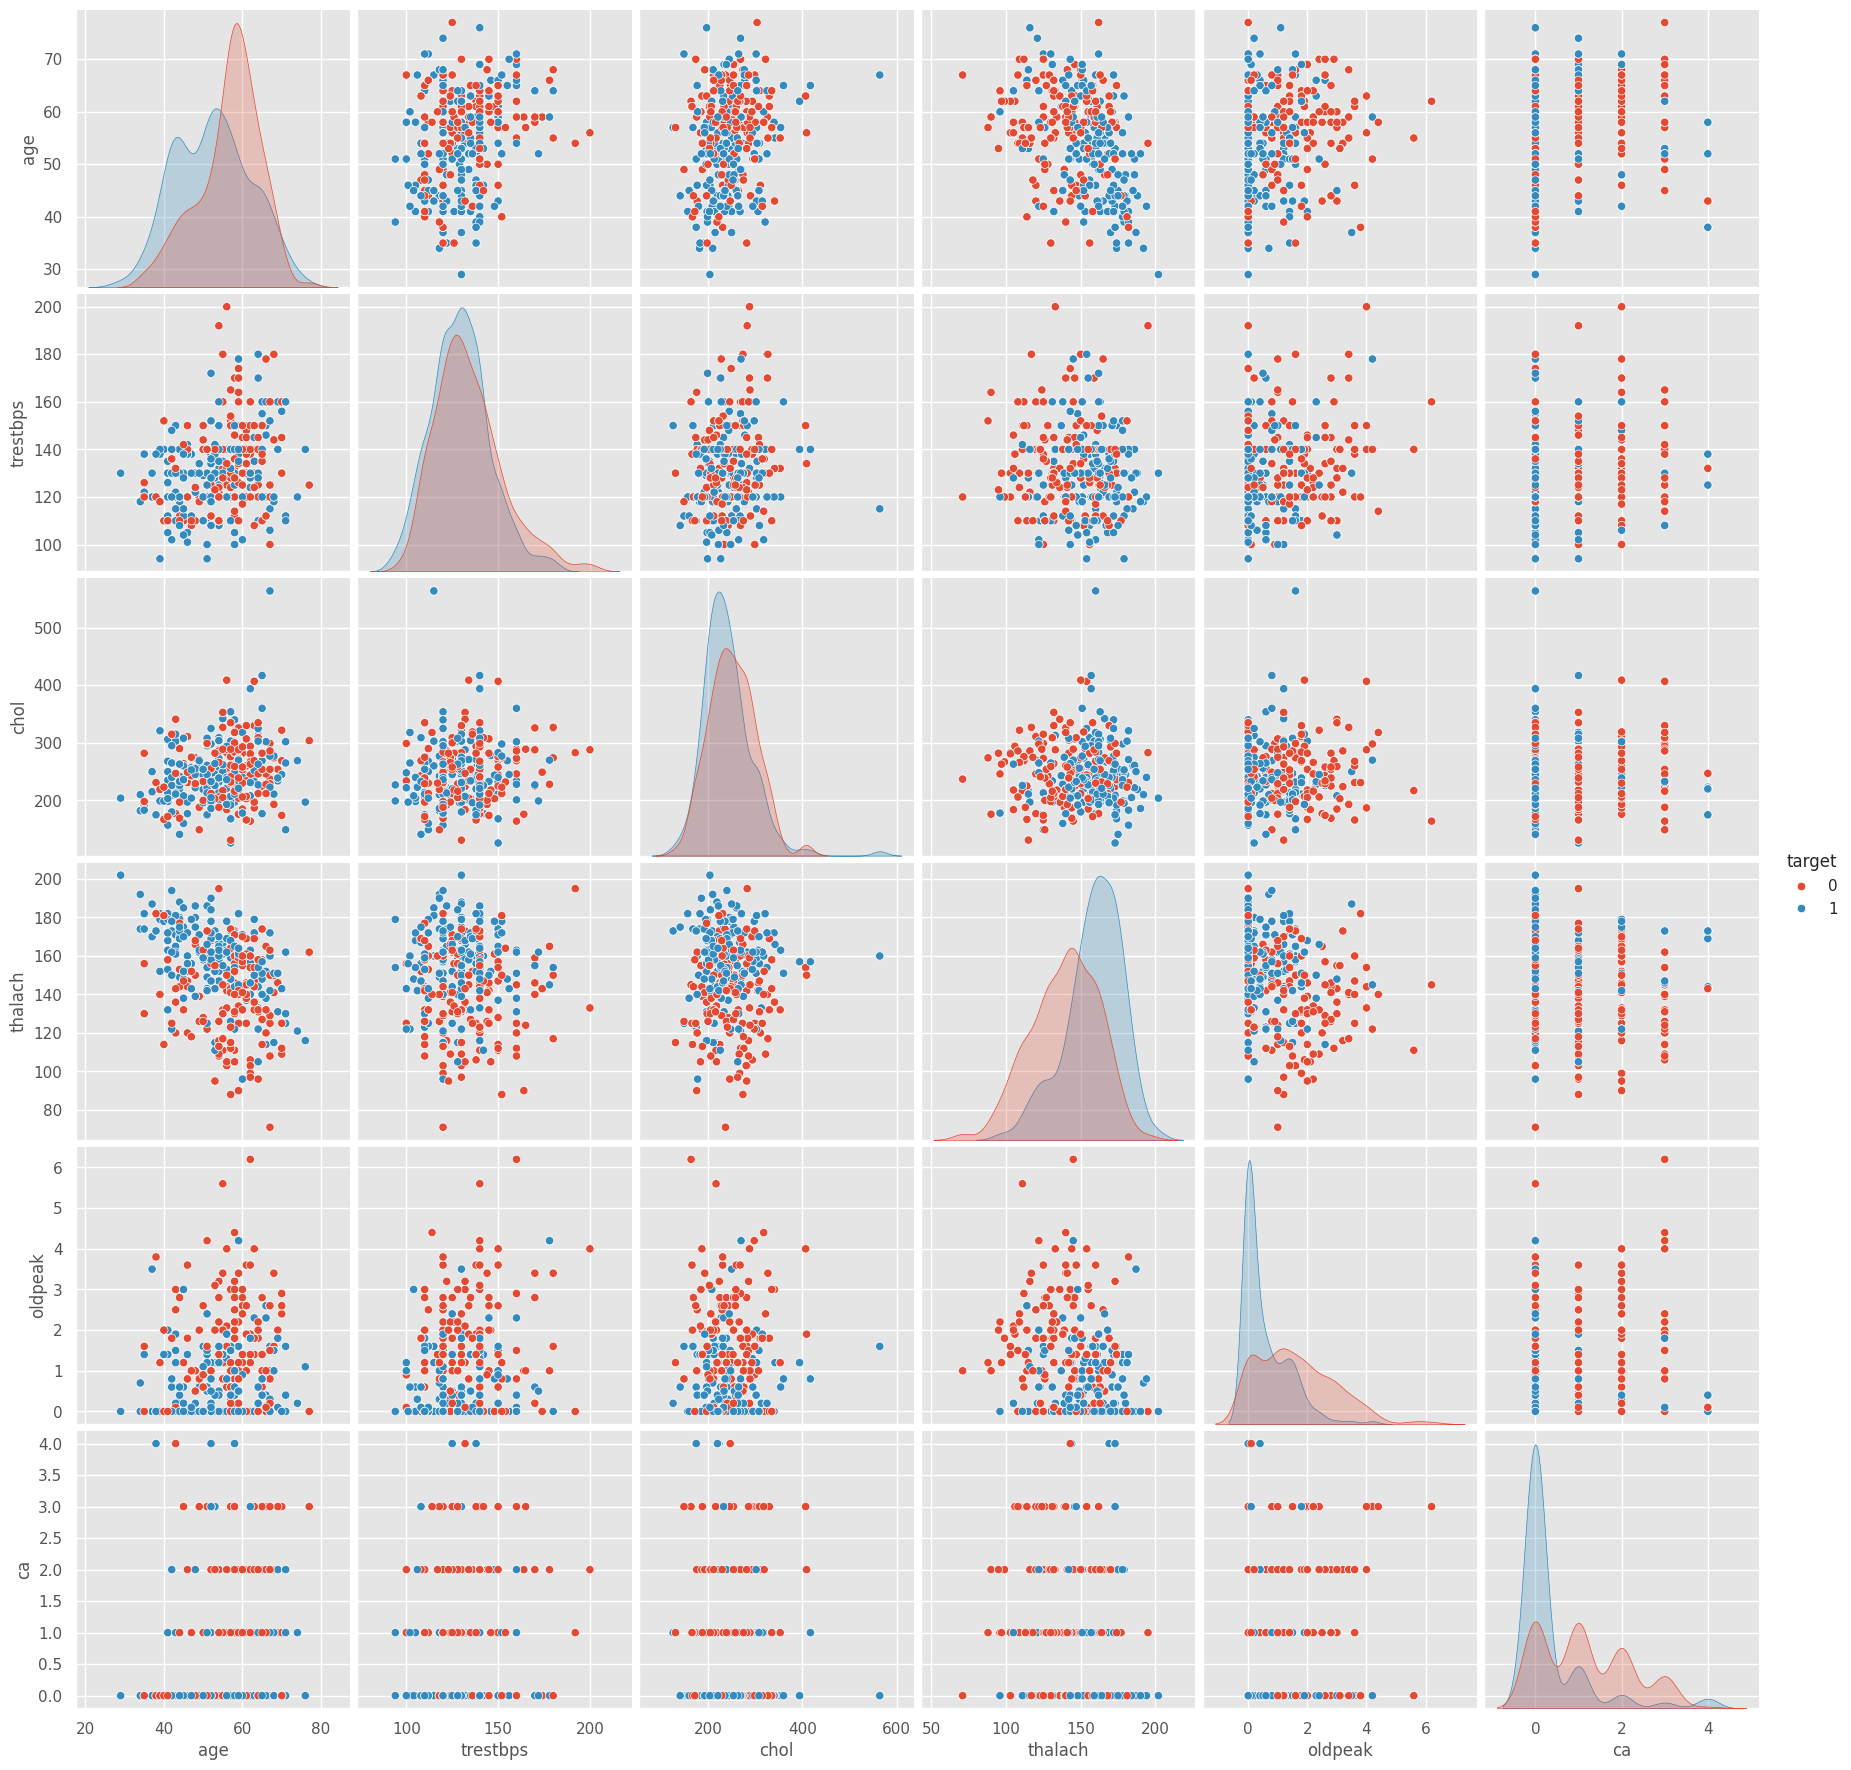

In [ ]:
var = ['age','trestbps','chol','thalach','oldpeak','ca', 'target']
sns.pairplot(df[var], hue='target', height=3, diag_kind='kde')

**Resultado**: Hay una cierta tendencia donde los pacientes entre 40 - 60 años tienden a tener un **thalach** menor. Las demás variables no presentan valores muy dispersos.

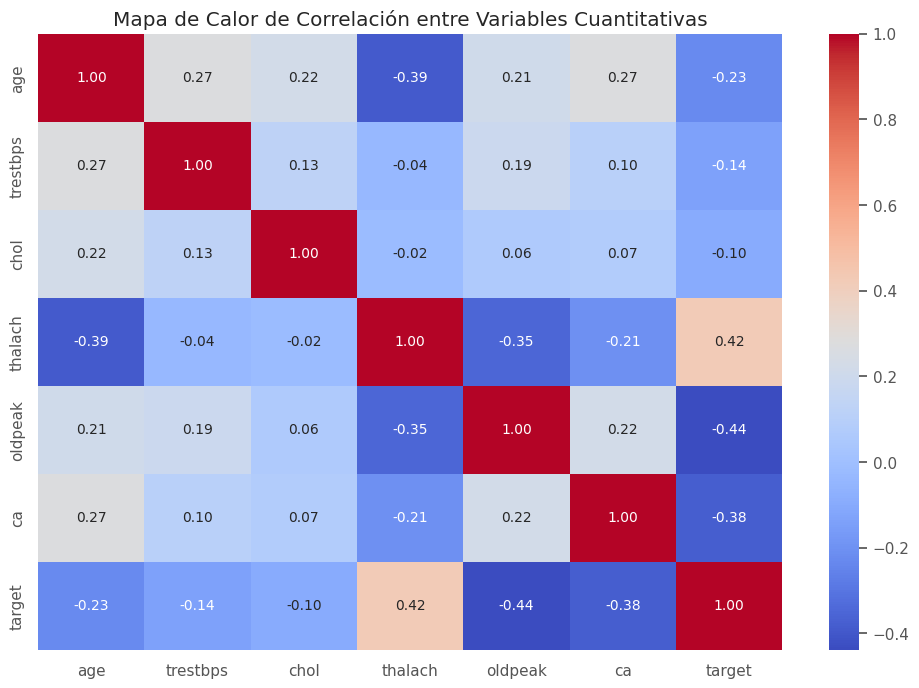

In [ ]:
corr = df[['age','trestbps','chol','thalach','oldpeak','ca','target']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables Cuantitativas")
plt.show()

**Resultado**: Se visualiza que la variabla **thalach** tiene una relación negativa con la variable **age**, esto quiere decir, que a mayor edad se reduce la **frecuencia cardiáca (thalach)**.
También una relación negativa pero baja entre las variables **odpeak y thalach**, lo que podría considerarse como un factor determinante para los ataques cardiácos.
Las otras variables tienen valores bajos de correlación lo que quiere decir que no tiene una relación fuerte, pero, existe la posibilidad que una de las variables tenga una correlación fuerte con otra variable, que no sea target.

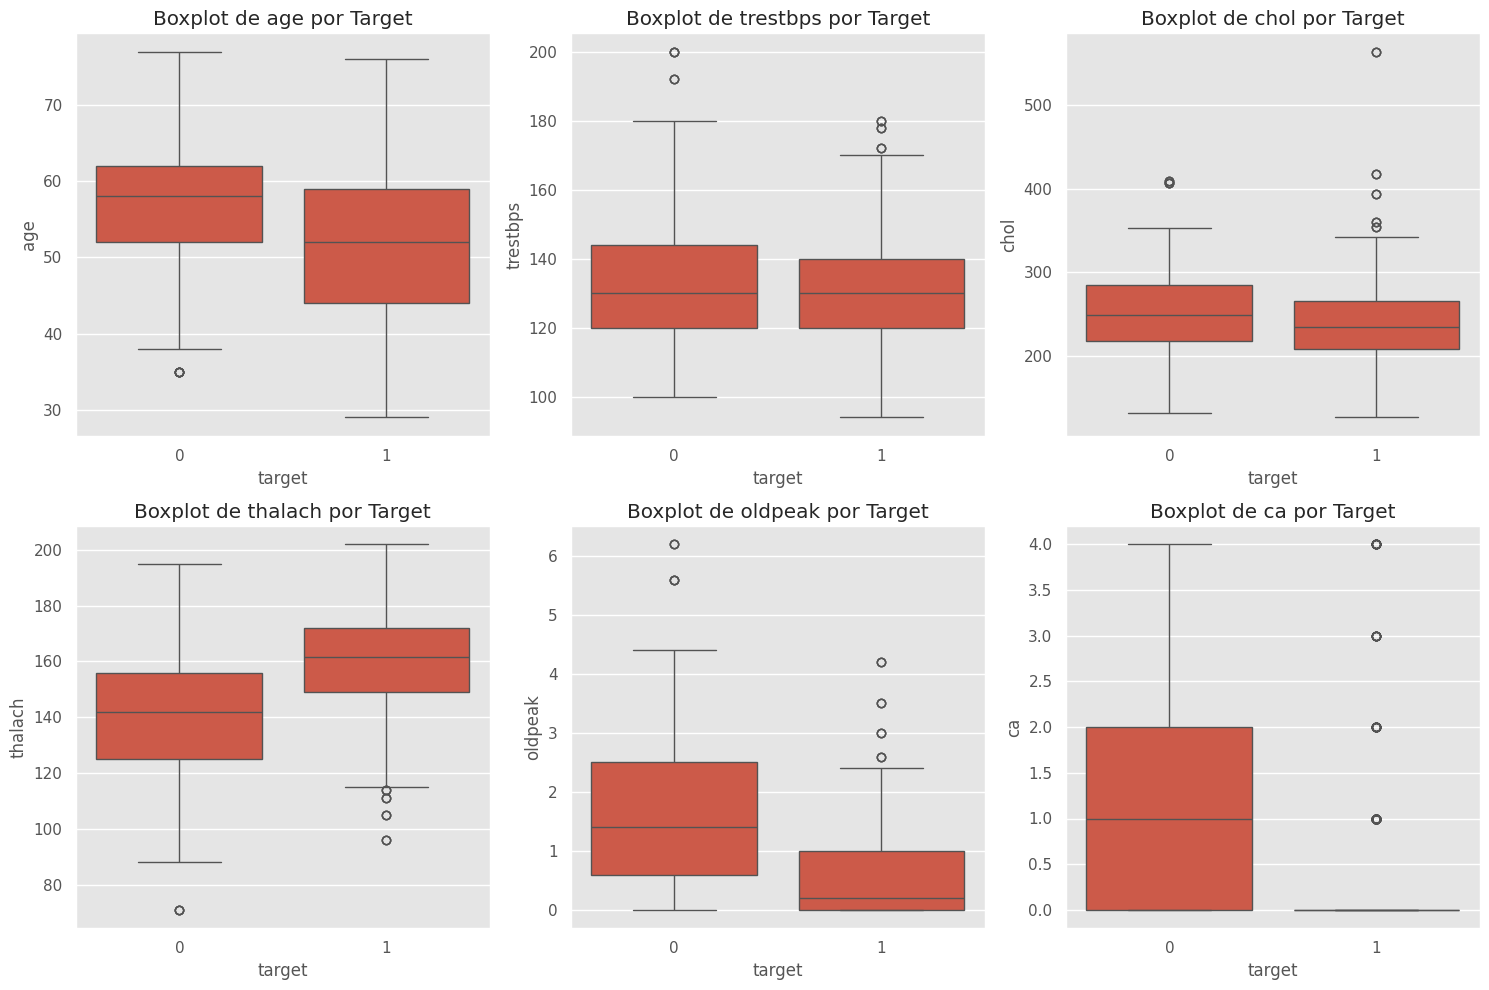

In [ ]:
var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

plt.figure(figsize=(15, 10))

for i, variable in enumerate(var, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=variable, data=df)
    plt.title(f'Boxplot de {variable} por Target')

plt.tight_layout()
plt.show()

**Resultado**: En este diagrama de cajas (boxplot) podemos visualizar que en la variable **age** se hay una tendencia de ataques cardíacos, en especial para aquellas personas cuyo rango de edad se encuentra entre los 40 a 60 años.
Las variables **trestbps y chol** no tienen una diferencia entre los dos grupos respecto a la variable **target**. Esto podría indicarnos que no estan muy relacionadas con la variable target.
En cuanto a la variable **thalach** se visualiza que aquellos que tienen mayor frecuencia cardiáca, tienden a tener una mayor probabilidad de sufrir ataques cardíacos.
Las variables **oldpeak y ca** muestra un menor riesgo a sufrir ataques.

# **Variables Cualitativas**

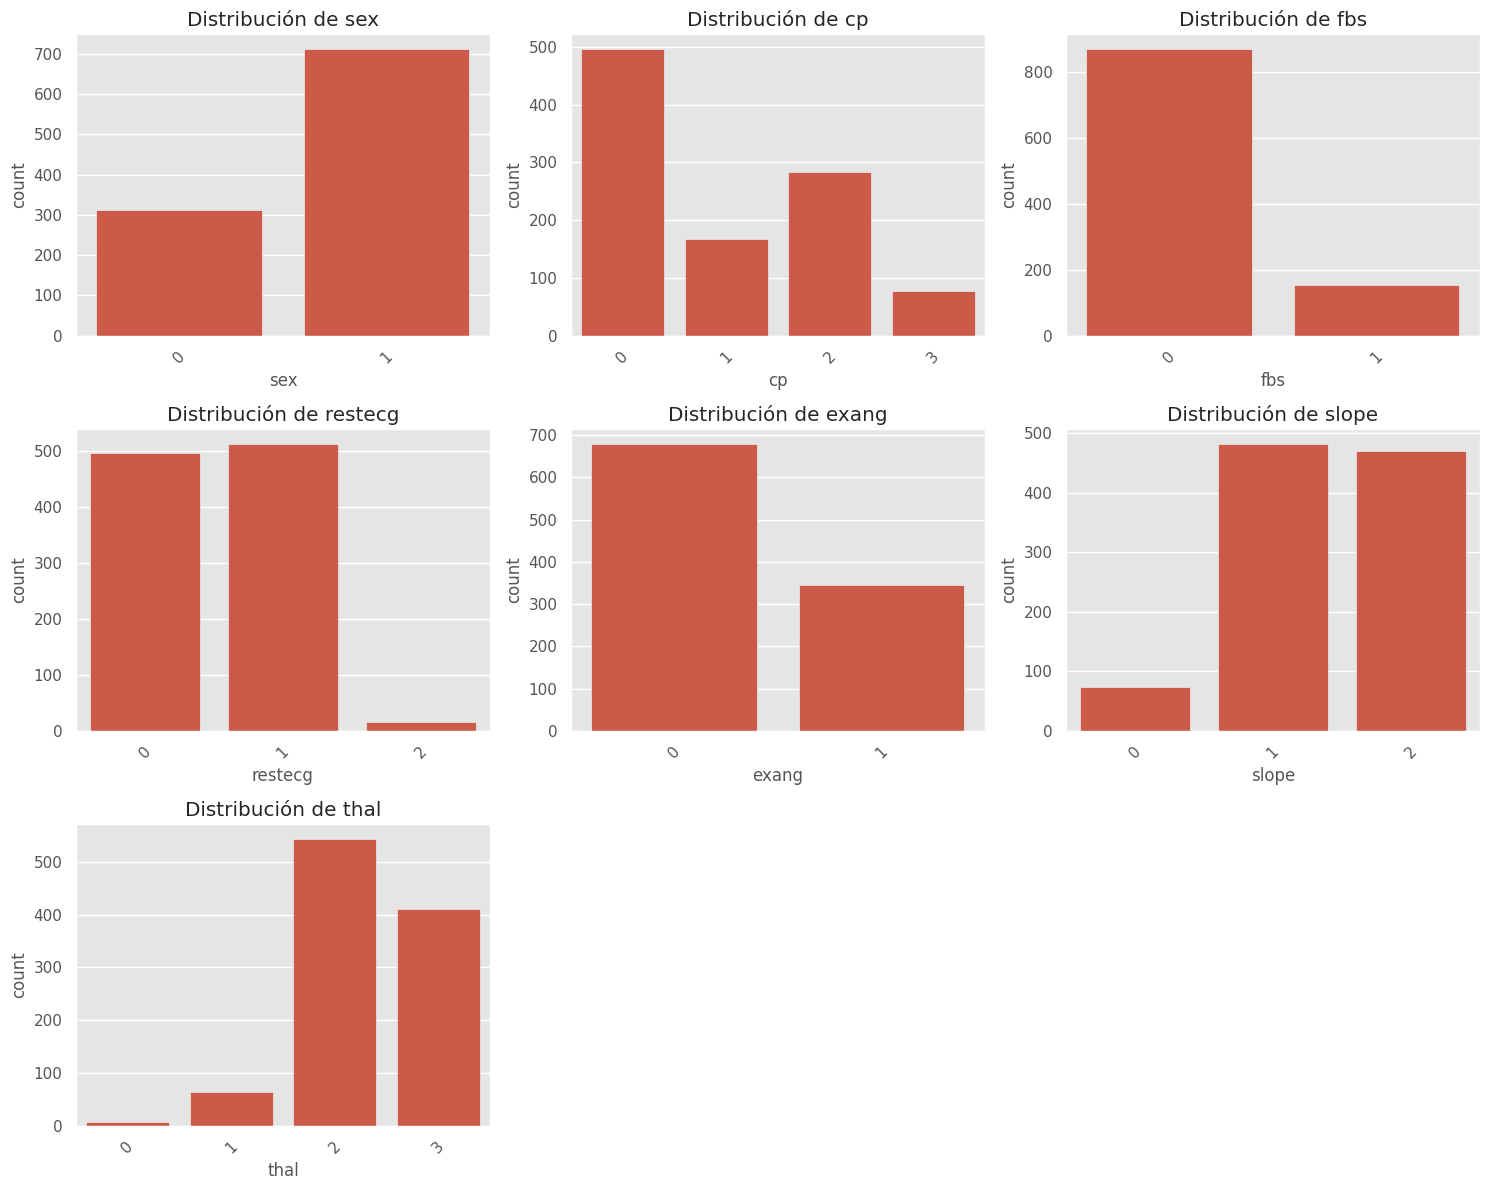

In [ ]:
var1 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(var1, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=variable)
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Resultado**:

De los datos que se tienen sobre el **género(sex)**, se puede evidenciar que la mayoría de personas son del sexo masculino.

En cuanto a la variable **cp** la angina tipica es el dolor de pecho más común.

Para la variable **fbs**, la mayoría tiene un nivel de azúcar menor a 120.

Para la variable **restecg**, indica que tiene una anomalía en su electrocardiograma.

Para la variable **exang**, los pacientes no tienen más a tener angina inducida por el ejercicio.

Para **slope y thal** se reparten entre 2 categorías, podría tomarse en cuenta para el modelo.

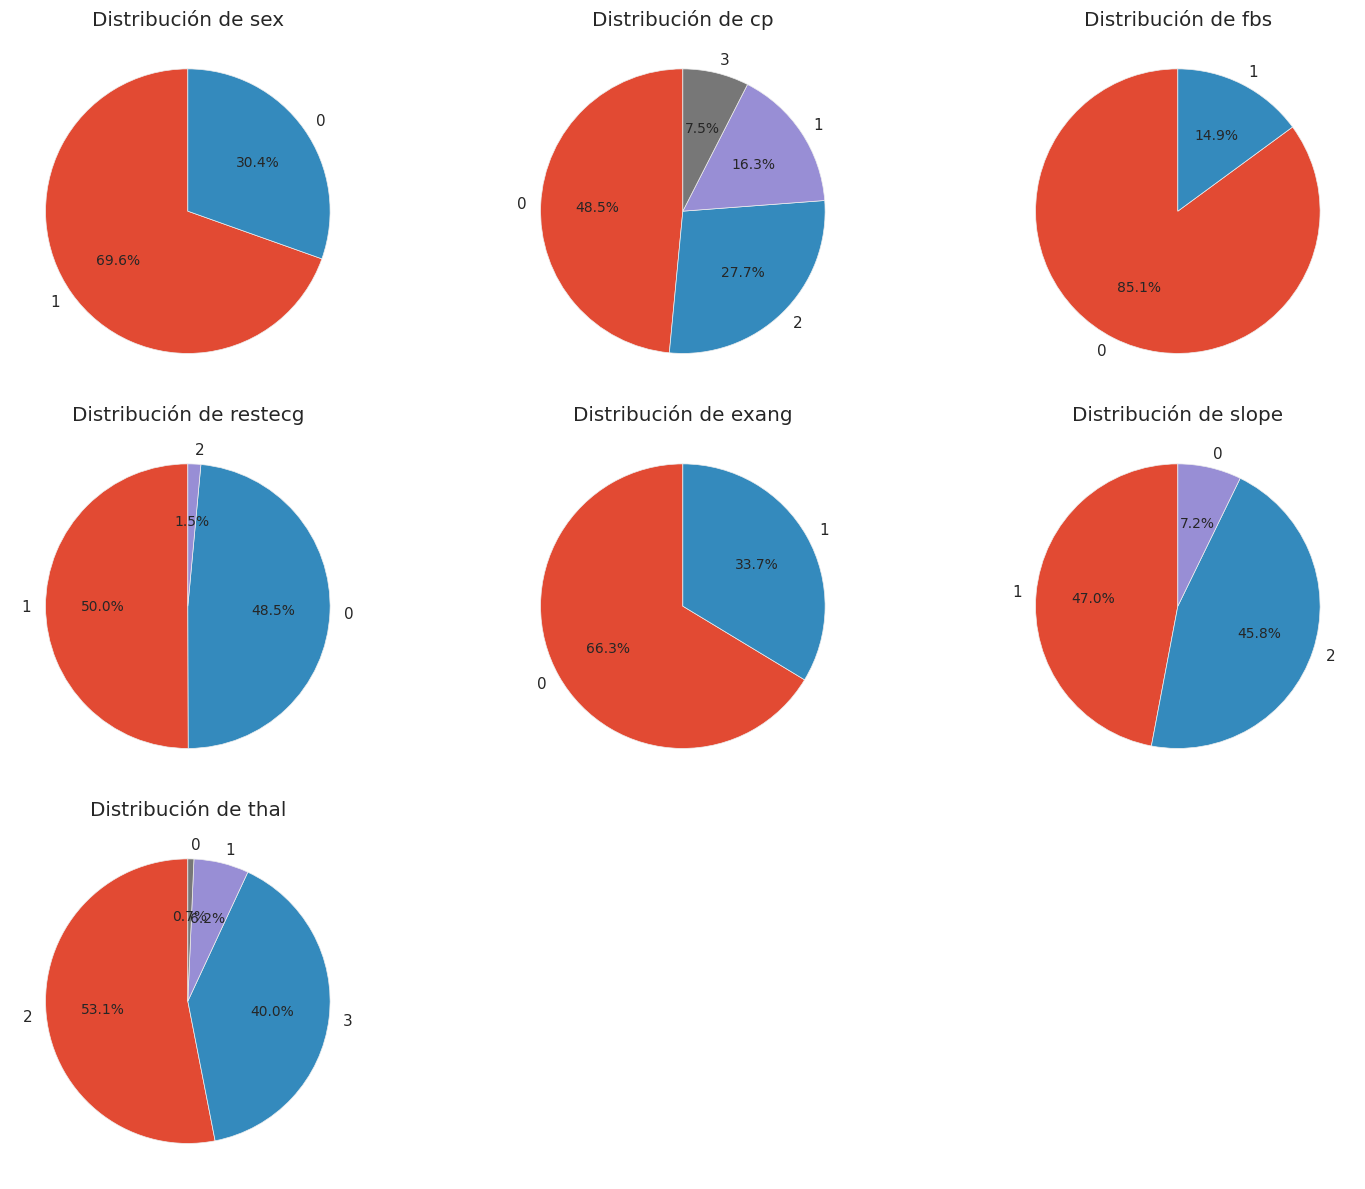

In [ ]:
var2= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(var2, 1):
    plt.subplot(3, 3, i)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de {variable}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Resultado**: En esta gráfica se puede visualizar la distribución de los datos de estas variables, nos ayuda a complementar el gráfico anterior.

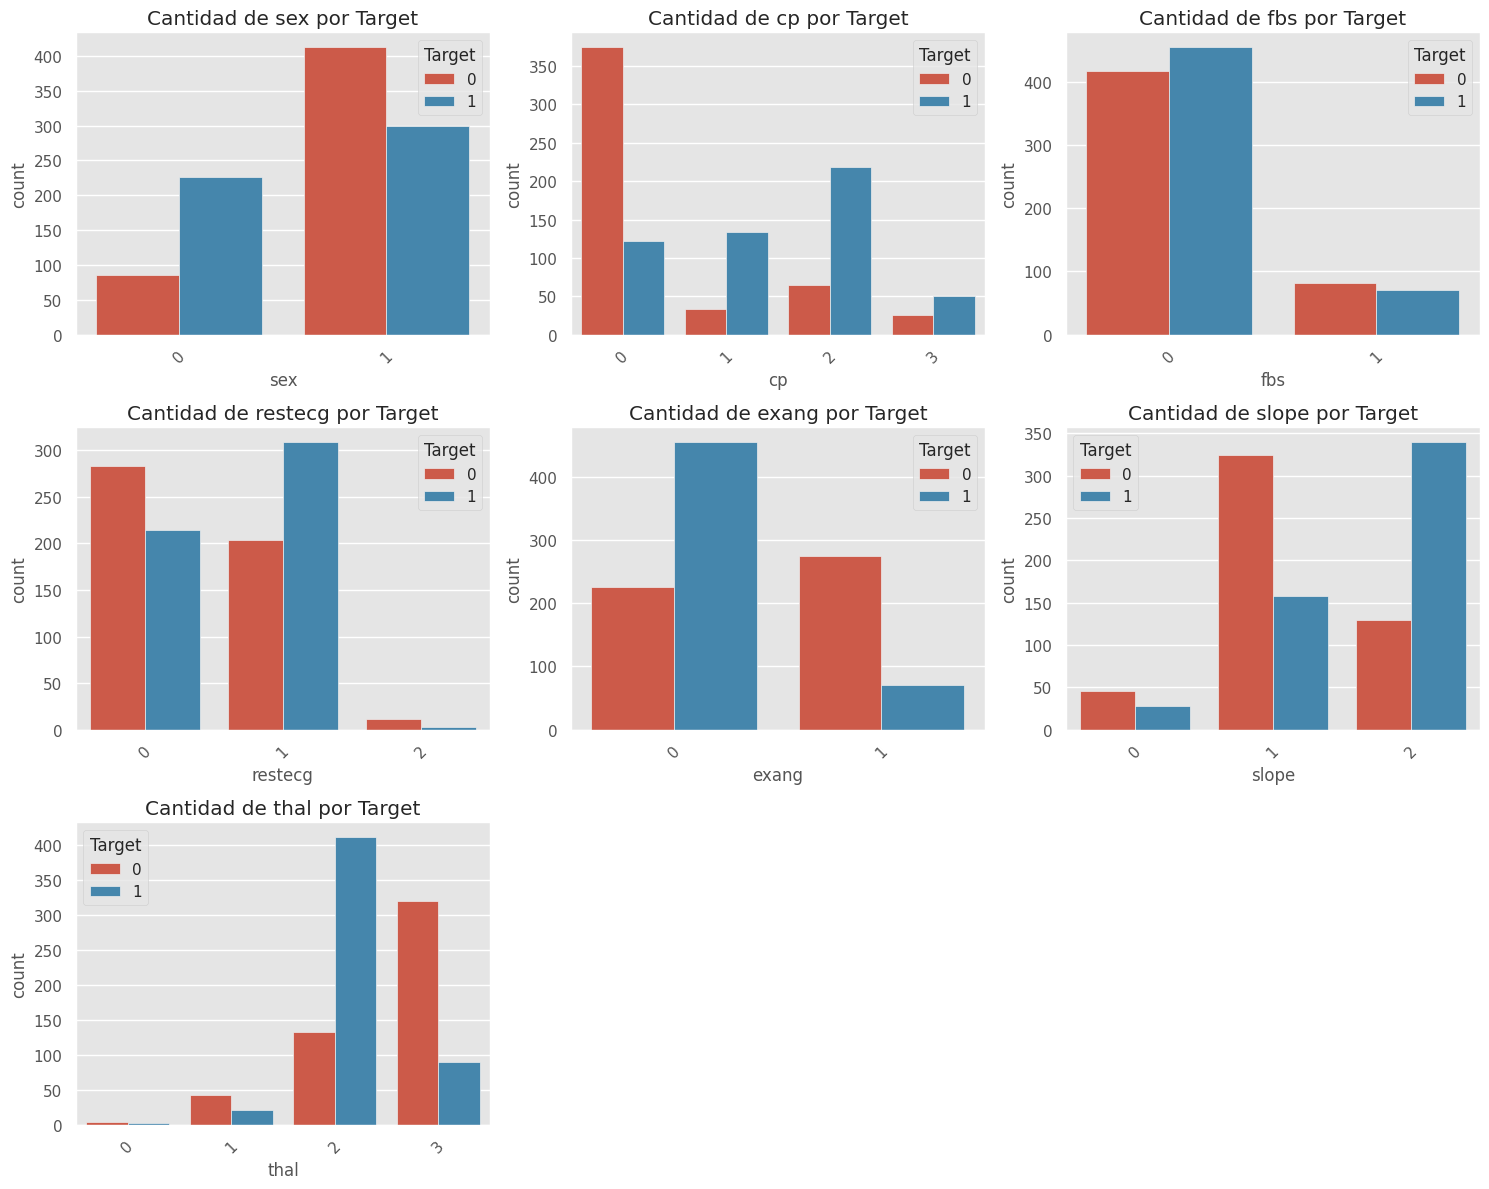

In [ ]:
var3 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(var3, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=variable, hue='target')
    plt.title(f'Cantidad de {variable} por Target')
    plt.legend(title='Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Resultado**: Aqui se visualiza como las variables cualitativas varían respecto a la variable target.

La variable **sex** indica que los hombres tienen más riesgo de sufrir un ataque cardíaco y,
para la variable **cp**, aquellos que tienen angina tipica y dolor no anginoso tienen más riesgo a padecer un ataque.

En **exang**, aquellos que no tienen angina anducida por ejercicio, tienen más riesgo de padecer un ataque.

En la variable **slope** el valor plano (2) es más propenso a un ataque.

In [ ]:
correlacion = df[['sex', 'fbs', 'cp', 'restecg', 'exang', 'slope', 'thal', 'target']].corr()
correlacion_target = correlacion['target'].sort_values(ascending=False)
print(correlacion_target)

target     1.000000
cp         0.434854
slope      0.345512
restecg    0.134468
fbs       -0.041164
sex       -0.279501
thal      -0.337838
exang     -0.438029
Name: target, dtype: float64


**Resultado**: Mediante la validación de correlación, podemos visualizar que existe una correlación positiva y significativa con la variable **CP**.

También se visualiza una correlación inversa con la variable **exang**.

Las demás variables no representan una correlación fuerte.

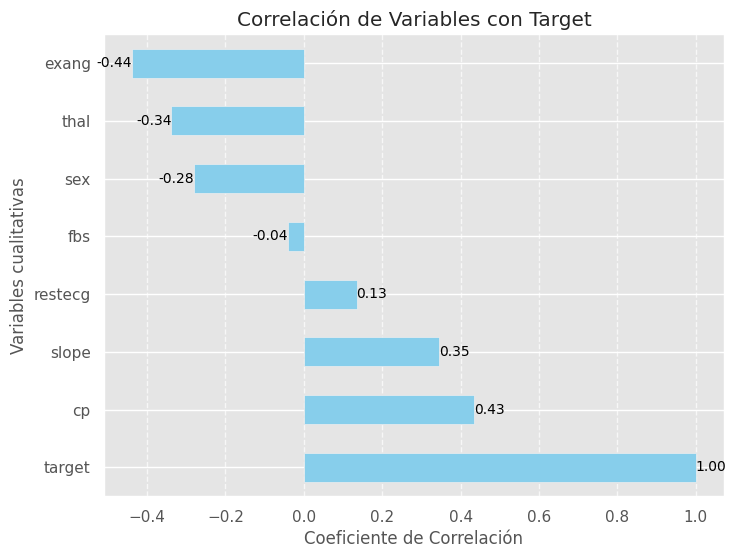

In [ ]:
plt.figure(figsize=(8, 6))
correlacion_target.plot(kind='barh', color='skyblue')
plt.title('Correlación de Variables con Target')
for index, value in enumerate(correlacion_target):
  if value < 0:
    plt.text(value,index,f'{value:.2f}',
              va='center',
              ha='right',
              color='black')
  else:
    plt.text(value,index,f'{value:.2f}',
              va='center',
              ha='left',
              color='black')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables cualitativas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Resultado**: De manera más gráfica podemos ver la correlación que existe entre las variables cualitativas con la variable target.

Para el modelo, las variables con mayor relación con target son:    

**Cuantitativas:** thalach, oldpeak, ca

**Cualitativas**: cp, exang

In [ ]:

#Prueba1
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar todas las columnas para el análisis
selected_columns = ['age','thalach','oldpeak','ca']
data_selected = df[selected_columns]

#'age','trestbps','chol','thalach','oldpeak','ca'

# Aplicar Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_selected)
data_minmax_df = pd.DataFrame(data_minmax, columns=selected_columns)

# Aplicar Z-Score Normalization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data_selected)
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_columns)

# Mostrar los resultados normalizados (primeras filas)
data_minmax_df.head(), data_standardized_df.head()

(        age   thalach   oldpeak    ca
 0  0.479167  0.740458  0.161290  0.50
 1  0.500000  0.641221  0.500000  0.00
 2  0.854167  0.412214  0.419355  0.00
 3  0.666667  0.687023  0.000000  0.25
 4  0.687500  0.267176  0.306452  0.75,
         age   thalach   oldpeak        ca
 0 -0.268437  0.821321 -0.060888  1.209221
 1 -0.158157  0.255968  1.727137 -0.731971
 2  1.716595 -1.048692  1.301417 -0.731971
 3  0.724079  0.516900 -0.912329  0.238625
 4  0.834359 -1.874977  0.705408  2.179817)

In [ ]:
#prueba 2

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar todas las columnas para el análisis
selected_columns = ['age','trestbps','chol','thalach','oldpeak','ca']
data_selected = df[selected_columns]

#'age','trestbps','chol','thalach','oldpeak','ca'

# Aplicar Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_selected)
data_minmax_df = pd.DataFrame(data_minmax, columns=selected_columns)

# Aplicar Z-Score Normalization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data_selected)
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_columns)

# Mostrar los resultados normalizados (primeras filas)
data_minmax_df.head(), data_standardized_df.head()

(        age  trestbps      chol   thalach   oldpeak    ca
 0  0.479167  0.292453  0.196347  0.740458  0.161290  0.50
 1  0.500000  0.433962  0.175799  0.641221  0.500000  0.00
 2  0.854167  0.481132  0.109589  0.412214  0.419355  0.00
 3  0.666667  0.509434  0.175799  0.687023  0.000000  0.25
 4  0.687500  0.415094  0.383562  0.267176  0.306452  0.75,
         age  trestbps      chol   thalach   oldpeak        ca
 0 -0.268437 -0.377636 -0.659332  0.821321 -0.060888  1.209221
 1 -0.158157  0.479107 -0.833861  0.255968  1.727137 -0.731971
 2  1.716595  0.764688 -1.396233 -1.048692  1.301417 -0.731971
 3  0.724079  0.936037 -0.833861  0.516900 -0.912329  0.238625
 4  0.834359  0.364875  0.930822 -1.874977  0.705408  2.179817)

de aqui empieza su codigo

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       102
           1       0.75      0.78      0.77       103

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



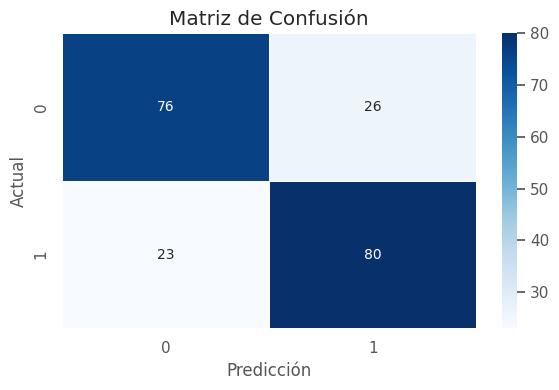

In [ ]:
#Prueba 1 de entrenamiento.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables predictoras (features) y variable objetivo (target)
# Asegúrate de que 'variables_seleccionadas' contiene las columnas correctas
variables_seleccionadas = ['age','trestbps','chol','thalach','oldpeak','ca']  # Seleccionadas por su correlación con 'target'
X = df[variables_seleccionadas]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200, random_state=52)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()


Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.81      0.89      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



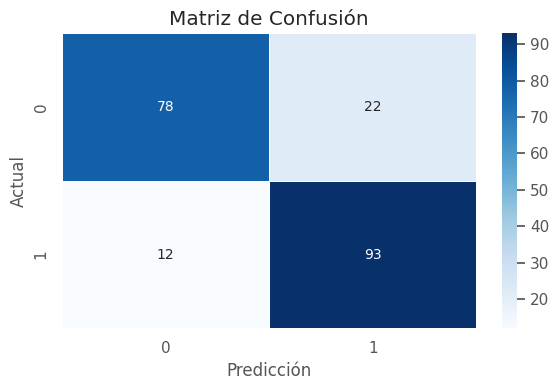

In [ ]:
#Prueba 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables predictoras (features) y variable objetivo (target)
# Asegúrate de que 'variables_seleccionadas' contiene las columnas correctas
variables_seleccionadas = ['age','trestbps','chol','thalach','oldpeak','ca','sex', 'fbs', 'cp', 'restecg', 'exang', 'slope', 'thal']  # Seleccionadas por su correlación con 'target'
X = df[variables_seleccionadas]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=62)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       399
           1       0.83      0.90      0.87       421

    accuracy                           0.86       820
   macro avg       0.86      0.85      0.86       820
weighted avg       0.86      0.86      0.86       820



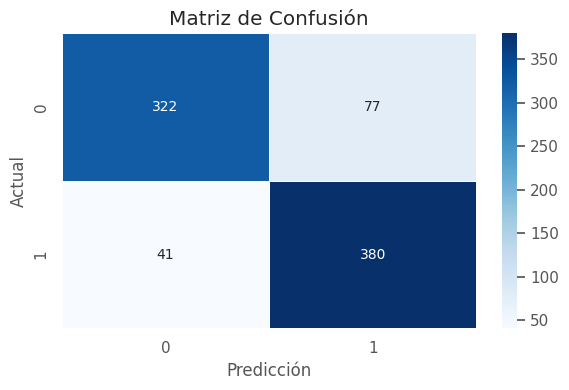

In [ ]:
# prueba de entrenamiento 03:
# alcance: Entrenar y predecir con los datos x_train e y_train
# aplicar normalización
# objetivo: Validar que el modelo entrenado con el 80%, pueda predecir de forma correcta, utilizando los mismo datos, es decir X_train
# no es lo recomendable, pero se usa para validar que el modelo generado, sea correcto y cumpla su función.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las columnas para el análisis
selected_columns = ['age','trestbps','chol','thalach','oldpeak','ca']
data_selected = df[selected_columns]

#'age','trestbps','chol','thalach','oldpeak','ca'

# Aplicar Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_selected)
data_minmax_df = pd.DataFrame(data_minmax, columns=selected_columns)

# Aplicar Z-Score Normalization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data_selected)
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_columns)

# Mostrar los resultados normalizados (primeras filas)
data_minmax_df.head(), data_standardized_df.head()


# Variables predictoras (features) y variable objetivo (target)
# Asegúrate de que 'variables_seleccionadas' contiene las columnas correctas
variables_seleccionadas = ['age','trestbps','chol','thalach','oldpeak','ca','sex', 'fbs', 'cp', 'restecg', 'exang', 'slope', 'thal']  # Seleccionadas por su correlación con 'target'
X = df[variables_seleccionadas]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=62)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_train)

# Evaluación del rendimiento
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_train, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

#random state que es

In [ ]:
from sklearn.model_selection import train_test_split

# Seleccionar solo las variables seleccionadas para el modelo
variables_seleccionadas = ['thalach', 'oldpeak', 'ca','cp','exang']  # Asegúrate de que esta lista tiene las columnas correctas
X = df[variables_seleccionadas]  # Variables predictoras seleccionadas
y = df['target']  # Variable objetivo

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

# Verificar tamaños de los conjuntos
print(f'Tamaño de entrenamiento: {X_train.shape}')
print(f'Tamaño de prueba: {X_test.shape}')


Tamaño de entrenamiento: (820, 5)
Tamaño de prueba: (205, 5)


Accuracy Score: 0.79
Recall Score: 0.87
Precision Score: 0.74


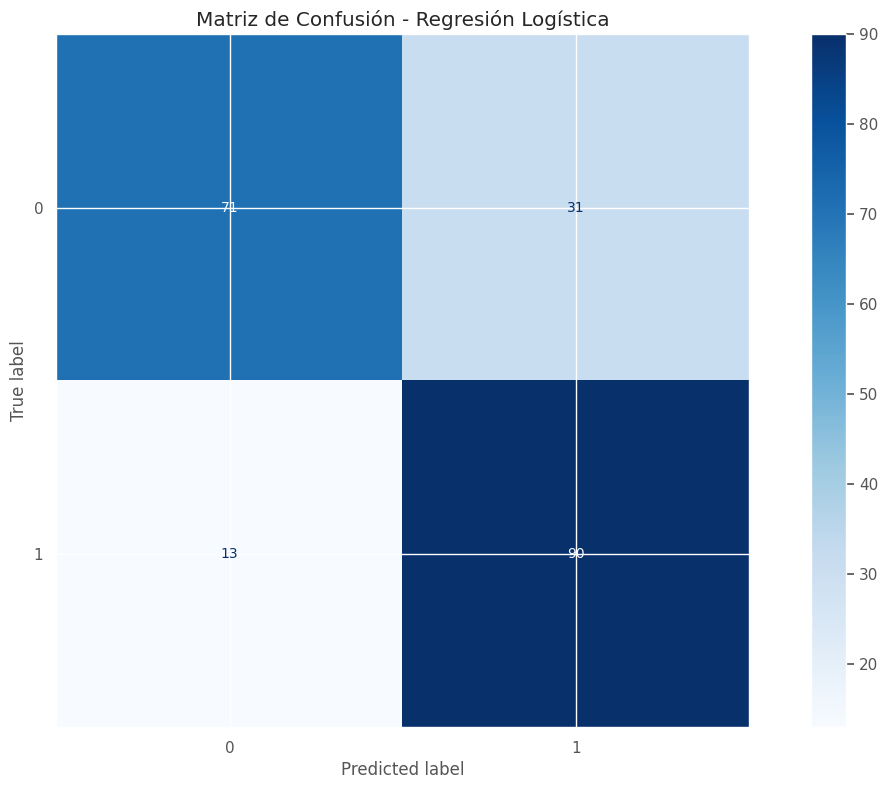

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall Score: {recall_score(y_test, y_pred):.2f}')
print(f'Precision Score: {precision_score(y_test, y_pred):.2f}')

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

Accuracy Score (SVC): 0.66
Recall Score (SVC): 0.72
Precision Score (SVC): 0.65


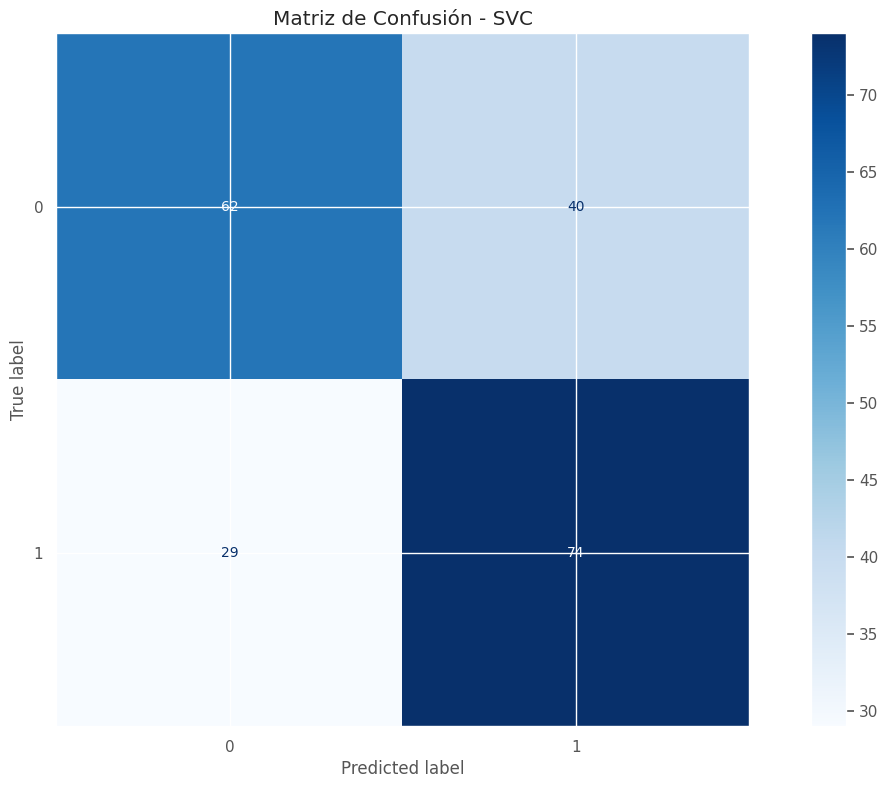

In [ ]:
from sklearn.svm import SVC

# Crear y ajustar el modelo SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)

# Predicciones con SVC
y_pred_svc = model_svc.predict(X_test)

# Evaluación del modelo SVC
print(f'Accuracy Score (SVC): {accuracy_score(y_test, y_pred_svc):.2f}')
print(f'Recall Score (SVC): {recall_score(y_test, y_pred_svc):.2f}')
print(f'Precision Score (SVC): {precision_score(y_test, y_pred_svc):.2f}')

# Matriz de confusión para SVC
ConfusionMatrixDisplay.from_estimator(model_svc, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - SVC')
plt.show()
